In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
from seaborn import lmplot
from seaborn import distplot
from seaborn import boxplot

# empezamos visualizando los datos originales

In [2]:
dataLimpio1 = pd.read_excel('Datos Contravencional 2020.xlsx')
dataLimpio1.head()

,numerocomparendo,tipocomparendo,fechaimposicion,horaimposicion,fechanotificacion,direccioninfraccion,ciudad,infraccion,cepo,metrolinea,...,nombre,valorcomp,saldo,valor_pagado,curso,tipo_curso,grado,numeroprueba,clasevehiculo,claseservicio
0,68001000000024846502,Manual,2020-01-01,01:50:00,2020-01-01,CARRERA 3 OCC CALLE 59,BUCARAMANGA,F,NO,NO,...,BUCARAMANGA,5266800,0,NaN,NaN,NaN,1.0,NaN,Motocicleta,Particular
1,68001000000024846503,Manual,2020-01-01,02:15:00,2020-01-01,CARRERA 3 OCC CALLE 59,BUCARAMANGA,F,NO,NO,...,BUCARAMANGA,2633400,0,NaN,NaN,Interno,0.0,NaN,Motocicleta,Particular
2,68001000000024843956,Manual,2020-01-01,02:50:00,2020-01-01,AVENIDA VIA AL MAR TRASVERSAL CURVA DE LA VIRGEN,BUCARAMANGA,C14,NO,NO,...,BUCARAMANGA,438900,442239,NaN,NaN,Interno,NaN,NaN,Motocicleta,Particular
3,68001000000024843958,Manual,2020-01-01,02:50:00,2020-01-01,AVENIDA AL MAR TRASVERSAL CURVA VIRGEN,BUCARAMANGA,B01,NO,NO,...,BUCARAMANGA,234080,235861,NaN,NaN,NaN,NaN,NaN,Motocicleta,Particular
4,68001000000024846504,Manual,2020-01-01,02:50:00,2020-01-01,CARRERA 3W CALLE 59,BUCARAMANGA,F,NO,NO,...,BUCARAMANGA,5266800,0,NaN,NaN,NaN,1.0,NaN,Motocicleta,Particular


In [3]:
len(dataLimpio1)

8586

In [4]:
dataLimpio1.columns

Index(['numerocomparendo', 'tipocomparendo', 'fechaimposicion',
       'horaimposicion', 'fechanotificacion', 'direccioninfraccion', 'ciudad',
       'infraccion', 'cepo', 'metrolinea', 'chaleco', 'casco', 'pico',
       'restriccion_motocicleta', 'resolucion_111', 'licenciatransito',
       'tipodoc', 'documento', 'inmovilizado', 'grua', 'usuario', 'placaa',
       'entidad', 'nombreagente', 'estado', 'tipo_resolucion',
       'numero_resolucion', 'fecha_documento', 'fecha_pago', 'fecha_acuerdo',
       'placac', 'primernombre', 'segundonombre', 'primerapellido',
       'segundoapellido', 'celular', 'direccioninfractor', 'nombre',
       'valorcomp', 'saldo', 'valor_pagado', 'curso', 'tipo_curso', 'grado',
       'numeroprueba', 'clasevehiculo', 'claseservicio'],
      dtype='object')

### renombrando columnas para facil manipulacion

In [5]:
dataLimpio1.columns=['ncomp','tcomp','fcomp','hcomp','fnotifi','dirinfrac','ciudad','infrac','cepo','metro','chale','casco','pico','restmot','resolu111','licencia','tipodoc','ncedula','inmobi','grua','usuario','placaa','entidad','nomagen','estado','tiresol','nresol','fdocu','fpago','facuerdo','placac','primnom','segnom','primapell','segapell','cel','dirinfractor','name','valorcomp','saldo','valpag','curso','ticurso','grado','nprueba','clasvehicu','classervicio']

In [6]:
dataLimpio1.head()

,ncomp,tcomp,fcomp,hcomp,fnotifi,dirinfrac,ciudad,infrac,cepo,metro,...,name,valorcomp,saldo,valpag,curso,ticurso,grado,nprueba,clasvehicu,classervicio
0,68001000000024846502,Manual,2020-01-01,01:50:00,2020-01-01,CARRERA 3 OCC CALLE 59,BUCARAMANGA,F,NO,NO,...,BUCARAMANGA,5266800,0,NaN,NaN,NaN,1.0,NaN,Motocicleta,Particular
1,68001000000024846503,Manual,2020-01-01,02:15:00,2020-01-01,CARRERA 3 OCC CALLE 59,BUCARAMANGA,F,NO,NO,...,BUCARAMANGA,2633400,0,NaN,NaN,Interno,0.0,NaN,Motocicleta,Particular
2,68001000000024843956,Manual,2020-01-01,02:50:00,2020-01-01,AVENIDA VIA AL MAR TRASVERSAL CURVA DE LA VIRGEN,BUCARAMANGA,C14,NO,NO,...,BUCARAMANGA,438900,442239,NaN,NaN,Interno,NaN,NaN,Motocicleta,Particular
3,68001000000024843958,Manual,2020-01-01,02:50:00,2020-01-01,AVENIDA AL MAR TRASVERSAL CURVA VIRGEN,BUCARAMANGA,B01,NO,NO,...,BUCARAMANGA,234080,235861,NaN,NaN,NaN,NaN,NaN,Motocicleta,Particular
4,68001000000024846504,Manual,2020-01-01,02:50:00,2020-01-01,CARRERA 3W CALLE 59,BUCARAMANGA,F,NO,NO,...,BUCARAMANGA,5266800,0,NaN,NaN,NaN,1.0,NaN,Motocicleta,Particular


### quitando n/a de los nombres y juntando columnas nombres y apellidos de los infractores

In [7]:
primnomsna= dataLimpio1["primnom"].fillna(value="")
segnomsna = dataLimpio1["segnom"].fillna(value="")
primapellna = dataLimpio1["primapell"].fillna(value="")
segapellna = dataLimpio1["segapell"].fillna(value="")

### juntando nombres y apellidos para encontrar frecuencias de repeticion

In [8]:
dataLimpio1["nameapell"] = primnomsna.astype(str) + " " +segnomsna.astype(str)+ " " + primapellna.astype(str)+ " " + segapellna.astype(str)
dataLimpio1["nameapell"]

0                        CALAZAN  SALAZ 
1              LUIS CARLOS PEREZ ESCOBAR
2        FERNANDO ANDRES BOHORQUEZ NUÑEZ
3        FERNANDO ANDRES BOHORQUEZ NUÑEZ
4          KEVIN JOHAN GUTIERREZ RAMIREZ
                      ...               
8581            GALLEGO     WILMER PEREA
8582         YESID GONZALO MACILLA NAVAS
8583    GUILLERMO ANDRES FERREIRA RIVERA
8584            JHONNY  ALEXANDER CRESPO
8585               ANDRES F TOSCANO VEGA
Name: nameapell, Length: 8586, dtype: object

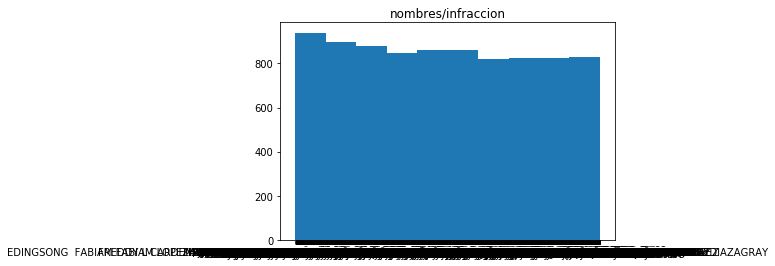

In [15]:
plt.title('nombres/infraccion')
plt.hist(dataLimpio1["nameapell"])
plt.show()

### hay demasiados, probando con mas limpieza:

In [51]:
#extraemos un nuevo dataset solo con los nombres y a este le añadimos la columna con su respectiva frecuencia
namefilter = pd.DataFrame({"nombres":dataLimpio1["nameapell"]})
namefilter['frecuencia'] = namefilter['nombres'].map(namefilter['nombres'].value_counts()) 
namefilter.head()

,nombres,frecuencia
0,CALAZAN SALAZ,1
1,LUIS CARLOS PEREZ ESCOBAR,1
2,FERNANDO ANDRES BOHORQUEZ NUÑEZ,2
3,FERNANDO ANDRES BOHORQUEZ NUÑEZ,2
4,KEVIN JOHAN GUTIERREZ RAMIREZ,1


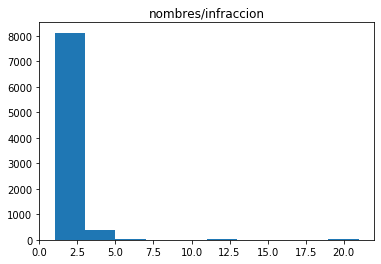

In [43]:
plt.title('nombres/infraccion')
plt.hist(namefilter['frecuencia'])
plt.show()

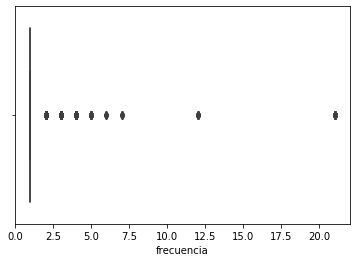

In [41]:
boxplot(namefilter.frecuencia)